In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("PdM_failures.csv")

In [3]:
print(df)
df.info()

                datetime  machineID failure
0    2015-01-05 06:00:00          1   comp4
1    2015-03-06 06:00:00          1   comp1
2    2015-04-20 06:00:00          1   comp2
3    2015-06-19 06:00:00          1   comp4
4    2015-09-02 06:00:00          1   comp4
..                   ...        ...     ...
756  2015-11-29 06:00:00         99   comp3
757  2015-12-14 06:00:00         99   comp4
758  2015-02-12 06:00:00        100   comp1
759  2015-09-10 06:00:00        100   comp1
760  2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [4]:
df.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [5]:
df['datetime']=pd.to_datetime(df['datetime'])

In [6]:
df=df[df['datetime'].dt.year!=2016]
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['failure_encoded']= label_encoder.fit_transform(df['failure'])
df['failure_encoded']+=1
df['failure'].unique()
df.head()

,datetime,machineID,failure,failure_encoded
0,2015-01-05 06:00:00,1,comp4,4
1,2015-03-06 06:00:00,1,comp1,1
2,2015-04-20 06:00:00,1,comp2,2
3,2015-06-19 06:00:00,1,comp4,4
4,2015-09-02 06:00:00,1,comp4,4


C:\Users\AKUMRA\AppData\Local\Temp\ipykernel_4224\979243234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

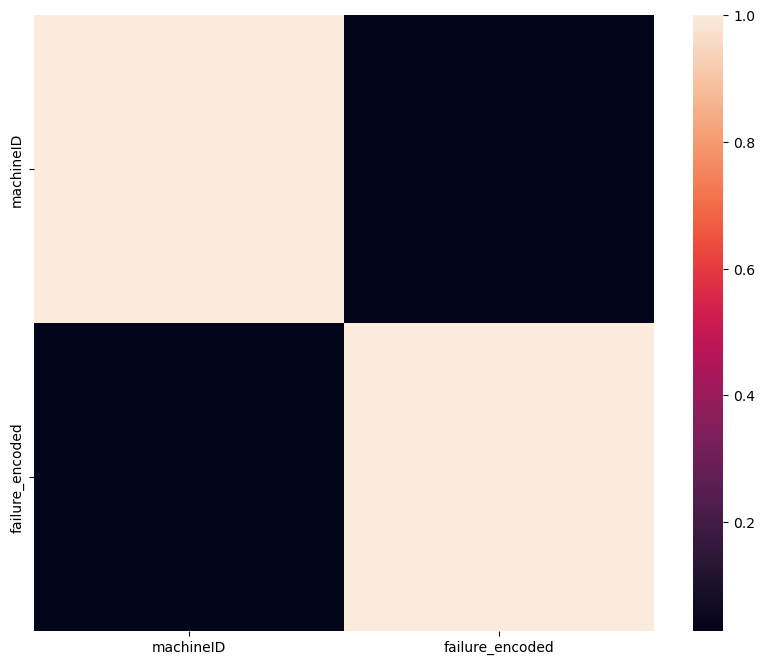

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

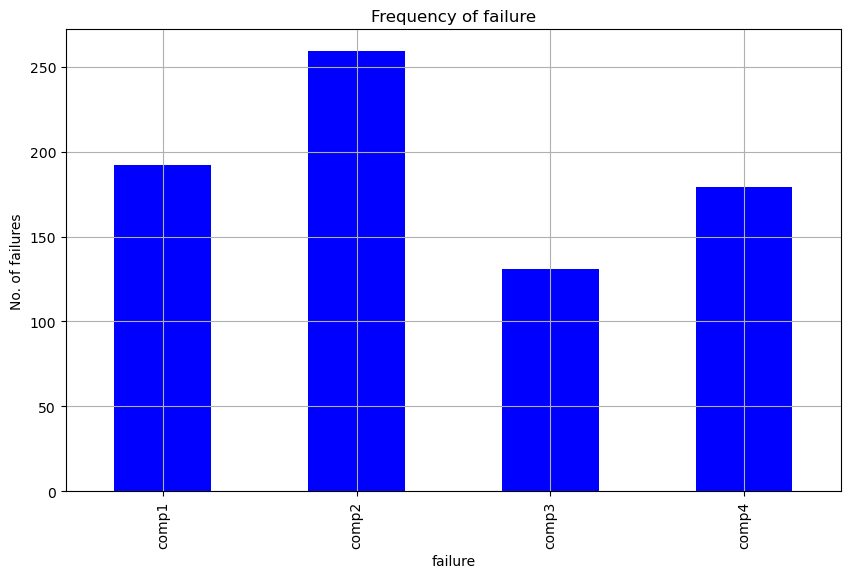

In [10]:
fail = df.groupby('failure')['failure_encoded'].size()
plt.figure(figsize=(10, 6))
fail.plot(kind='bar', color='blue')
fail.plot(kind='bar', color='blue')
plt.title('Frequency of failure')
plt.xlabel('failure')
plt.ylabel('No. of failures')
plt.grid(True)

plt.show()

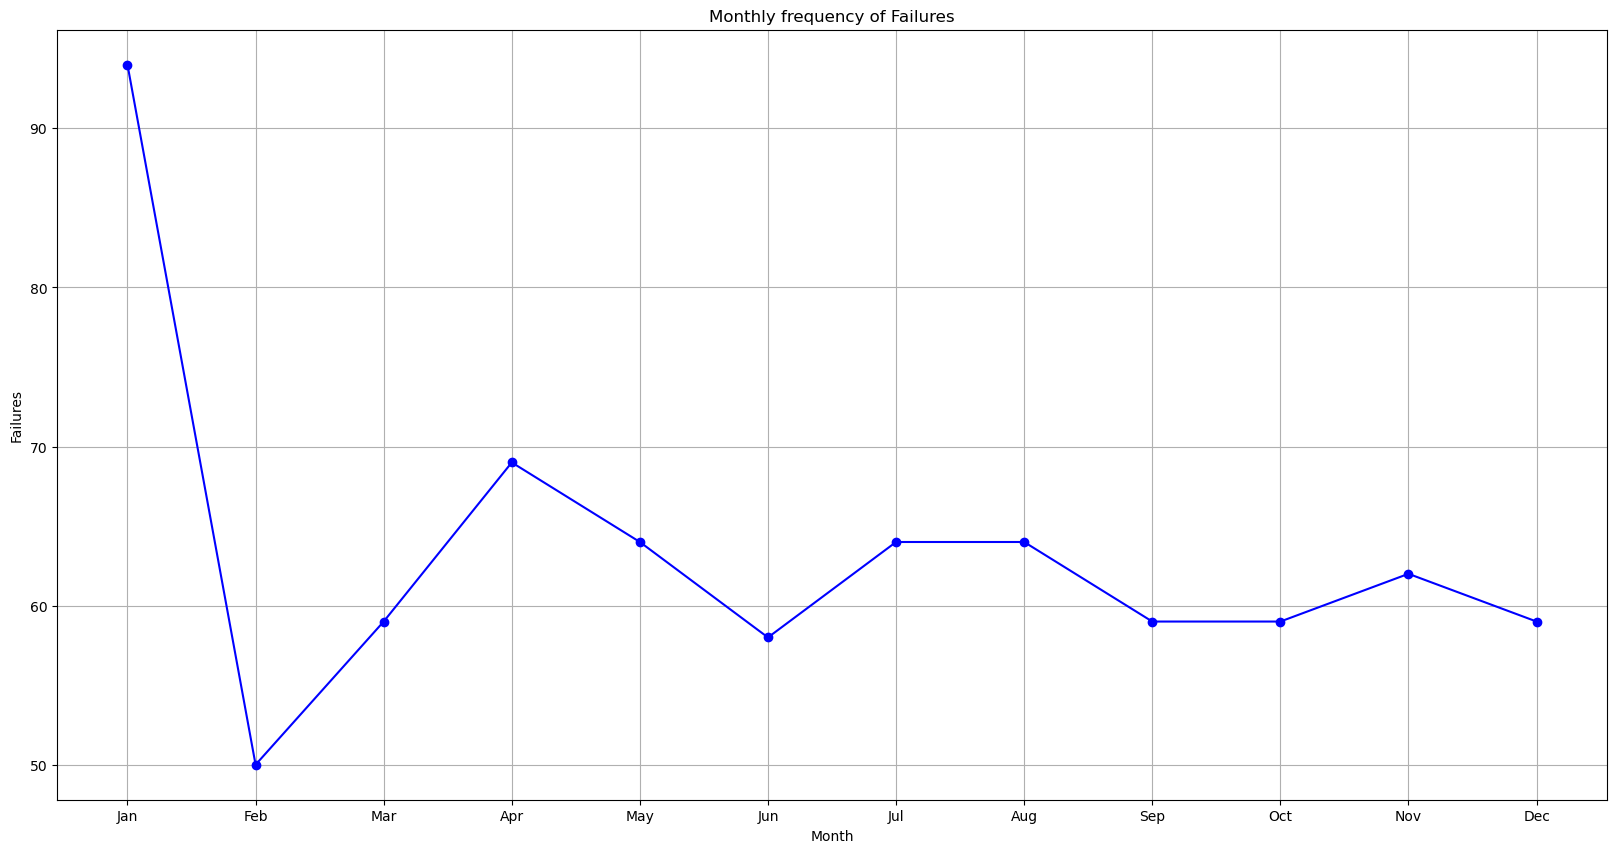

In [27]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['datetime'].dt.month

monthly_fail = df.groupby('month')['failure'].count()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.figure(figsize=(20, 10))
plt.plot(monthly_fail.index, monthly_fail.values, color='blue', marker='o')

plt.title('Monthly frequency of Failures')
plt.xlabel('Month')
plt.ylabel('Failures')
plt.xticks(monthly_fail.index, month_names)
plt.grid(True)

plt.show()

In [24]:
print("Month with lowest failure rate: Februrary with "+ str(monthly_fail.min())+ " failures")

Month with lowestt failure rate: Februrary with 50 failures


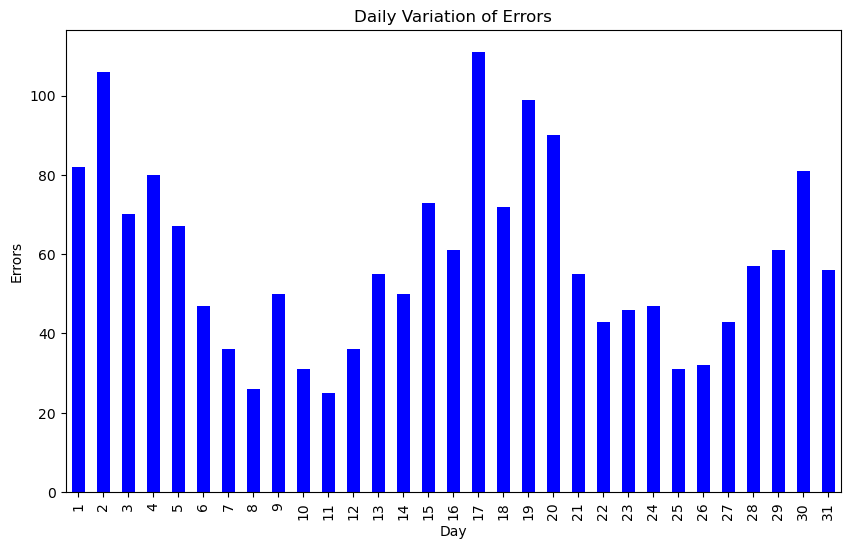

In [30]:
# print(df[df[‘Name’]==’Donna’].index.values)
#variation of pressure wrt each day 
df['datetime'] = pd.to_datetime(df['datetime'])

df['day'] = df['datetime'].dt.day

daily_fail = df.groupby('day')['failure_encoded'].sum()

plt.figure(figsize=(10, 6))
daily_fail.plot(kind='bar', color='blue')
plt.title('Daily Variation of Errors')
plt.xlabel('Day')
plt.ylabel('Errors')
# plt.grid(True)
plt.show()

<Axes: xlabel='machineID'>

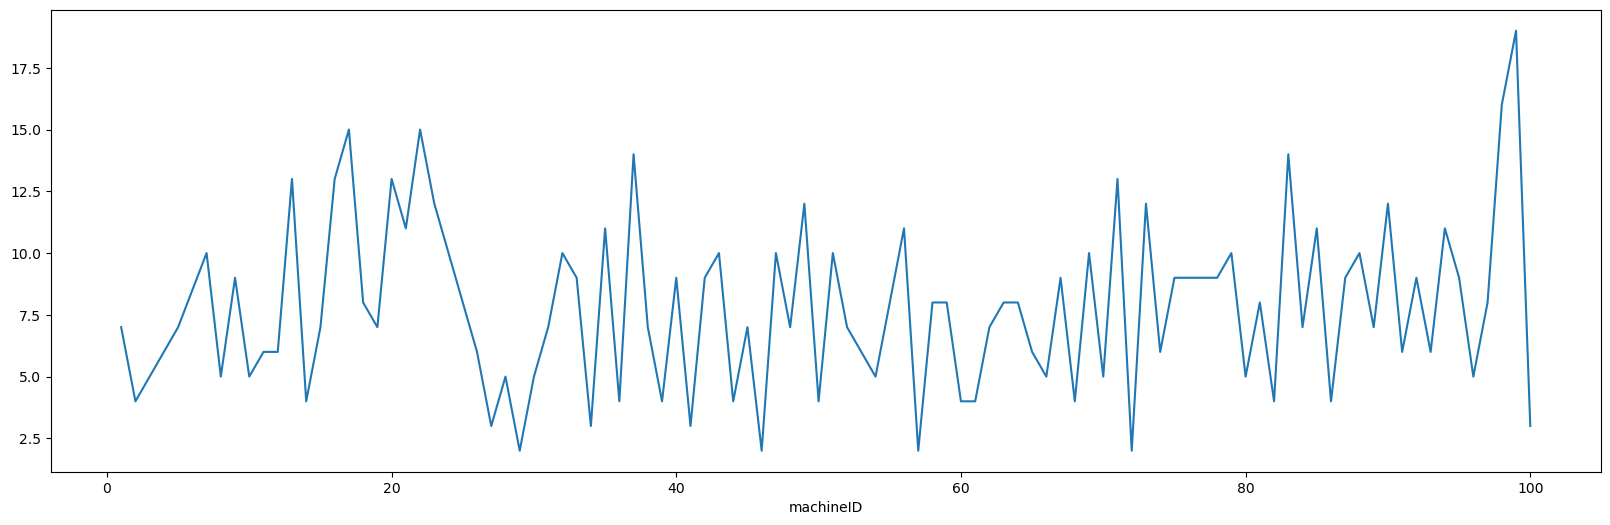

In [33]:
avg_fail = df.groupby('machineID')['failure_encoded'].size()
plt.figure(figsize=(20,6))
avg_fail.plot(kind='line')

In [49]:
df1=pd.read_csv("PdM_errors.csv")
df1['datetime'] = pd.to_datetime(df1['datetime'])
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df1['errorID_encoded']= label_encoder.fit_transform(df1['errorID'])
df1['errorID_encoded']+=1
df1['errorID_encoded'].unique()
df.head()

,datetime,machineID,failure,failure_encoded,month,day,errorID_encoded
0,2015-01-05 06:00:00,1,comp4,4,1,5,4
1,2015-03-06 06:00:00,1,comp1,1,3,6,1
2,2015-04-20 06:00:00,1,comp2,2,4,20,2
3,2015-06-19 06:00:00,1,comp4,4,6,19,4
4,2015-09-02 06:00:00,1,comp4,4,9,2,4


In [ ]:
df2=pd.merge(df,df1)

In [ ]:
print(df2)

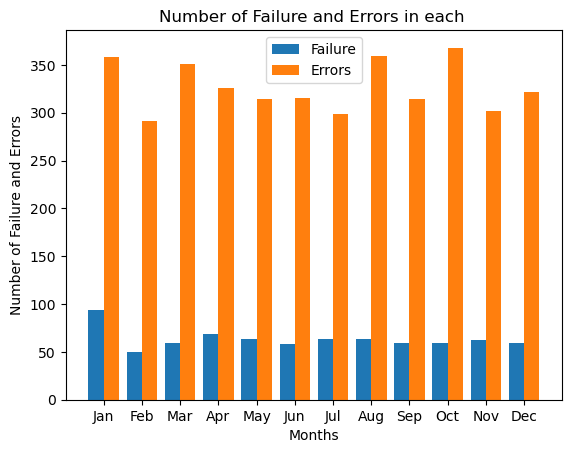

In [54]:
X = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = df['datetime'].dt.month
df1['month'] = df1['datetime'].dt.month
failure =  df.groupby('month')['failure'].count()
errors =  df1.groupby('month')['errorID_encoded'].count()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, failure, 0.4, label = 'Failure')
plt.bar(X_axis + 0.2, errors, 0.4, label = 'Errors')
  
plt.xticks(X_axis, X)
plt.xlabel("Months")
plt.ylabel("Number of Failure and Errors")
plt.title("Number of Failure and Errors in each ")
plt.legend()
plt.show()

<Axes: xlabel='machineID'>

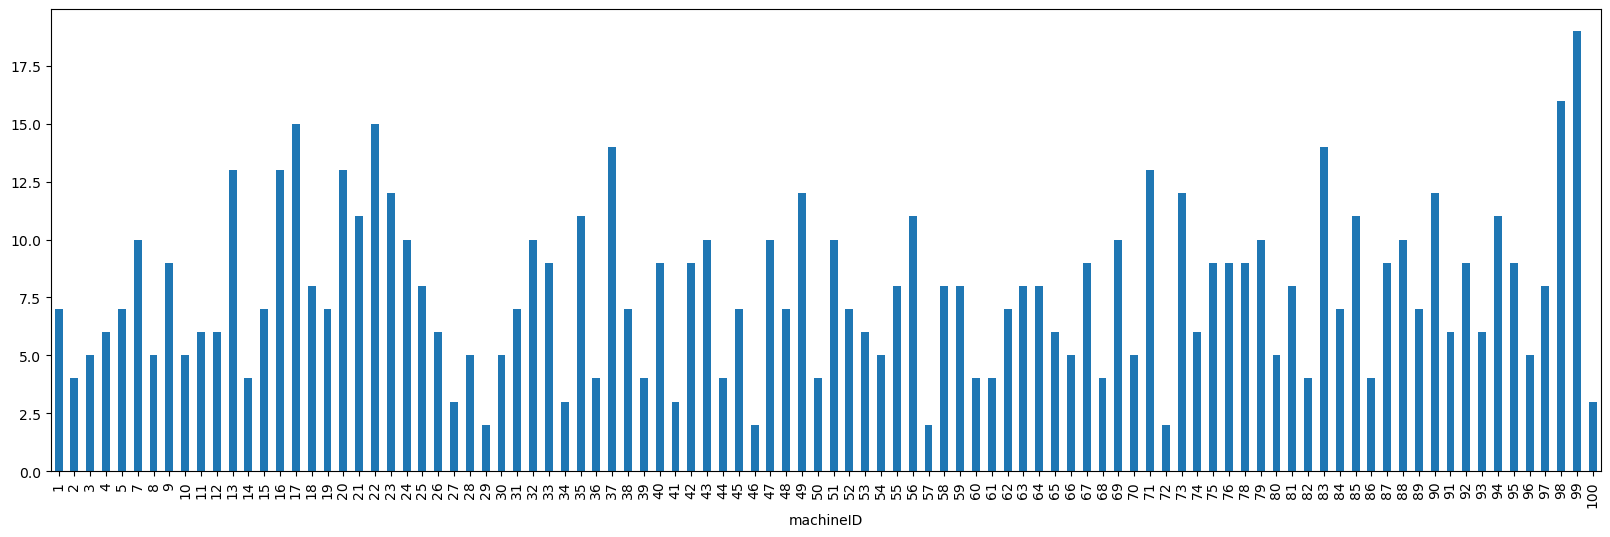

In [57]:
avg_failure = df.groupby('machineID')['failure_encoded'].size()
plt.figure(figsize=(20,6))
avg_failure.plot(kind='bar')